<img src="https://www.dane.gov.co/files/images/logos/logo-dane.svg" alt="Universidade Federal do Ceará" style="width: 190px;" align="left" frameborder="300"/>

**DANE - Detección de anomalías** <br>
**Carlos Eduardo Gutiérrez Urueña**  <br><br>

In [5]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data
from pyod.models.hbos import HBOS
import matplotlib.pyplot as plt
from pyod.models.combination import aom, moa, average, maximization # instalar la librería conda install combo
from pyod.utils.utility import standardizer
from pyod.models.hbos import HBOS

In [6]:
# Creando un conjunto de datos aleatorios de entrenamiento y de validación con un porcentaje del 5% de atípicos
X_train, X_test, Y_train, Y_test  = generate_data(
    n_train = 500,
    n_test = 500,
    n_features = 6,
    contamination = 0.05,
    random_state = 123)

In [7]:
# Convirtiendo el conjunto de datos de entrenamiento en un DataFrame
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
Y_train_pd = pd.DataFrame(Y_train)
Y_train_pd.head(20)
Y_train_pd[0].unique()

array([0., 1.])

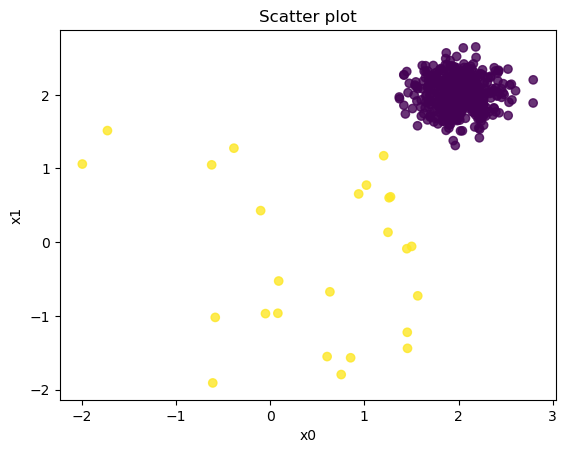

In [9]:
# Graficando las variables 0 y 1 en un scatter plot e identificando atípicos. Amarillo atípicos, morados, datos normales
plt.scatter(X_train_pd[0], X_train_pd[1], c = Y_train, alpha = 0.8) # c es la lista de colores de acuerdo con los valores únicos de esta variable, la cual en la líne anterior es 1,0
plt.title("Scatter plot")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [10]:
# Creando el modelo HBOS

n_bins = 50
hbos = HBOS(n_bins = n_bins, contamination = 0.05)
hbos.fit(X_train)

HBOS(alpha=0.1, contamination=0.05, n_bins=50, tol=0.5)

In [11]:
print("El umbral para los datos de ratio contaminados: ", hbos.threshold_)

El umbral para los datos de ratio contaminados:  5.563712646460526


In [12]:
# Creando las puntuaciones para los datos de entrenamiento y prediciendo dónde una instancia es atípica o no
# la función predict compara la puntuación de los datos atípicos con el umbral. Si la puntuación de un atípico es mayor al umbral, la función asigna 1, o en caso contrario , 0
# Datos de entrenamiento

Y_train_scores = hbos.decision_function(X_train)
Y_train_pred = hbos.predict(X_train)

# Datos de testeo o validación
Y_test_scores = hbos.decision_function(X_test)
Y_test_pred = hbos.predict(X_test)

In [13]:
Y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
Y_train_pred
#contanto el número de valores predichos
def count_stat(vector):
    unique, counts = np.unique(vector,
                               return_counts = True)
    return dict(zip(unique, counts))

print("Los datos de entrenamiento: ", count_stat(Y_train_pred))
print("Los datos de validación o test: ", count_stat(Y_test_pred))

Los datos de entrenamiento:  {0: 475, 1: 25}
Los datos de validación o test:  {0: 474, 1: 26}


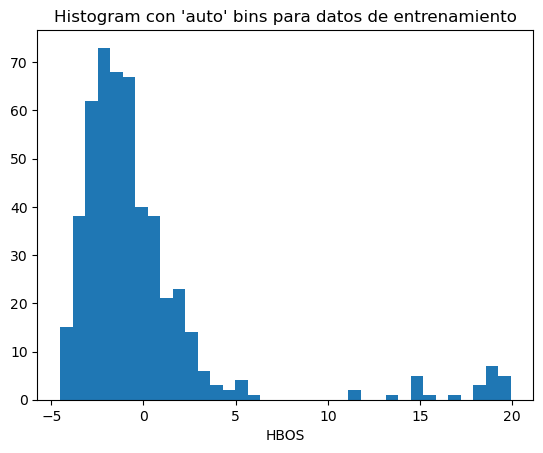

In [15]:
plt.hist(Y_test_scores, bins = 'auto')
plt.title("Histogram con 'auto' bins para datos de entrenamiento")
plt.xlabel('HBOS')
plt.show()

In [16]:
Y_test_scores

array([-4.80781484e-01, -1.11866907e+00, -2.43693211e+00, -5.40879477e-01,
       -2.09225820e+00, -4.34171923e+00,  1.74674957e+00,  5.25220724e-01,
       -1.07538917e+00, -1.98603732e+00,  4.79636719e-01, -3.66919565e+00,
       -2.10284534e+00, -2.72837300e+00,  5.56018300e-01,  3.89884407e-01,
       -8.28258328e-01, -4.48480899e+00, -2.34447683e-02,  7.57915991e-01,
       -2.82091320e+00, -4.40572801e-01,  2.44843271e+00, -4.20926463e+00,
       -2.34987545e+00, -1.05380230e+00,  4.33972399e-01, -1.19457951e+00,
        4.23612214e-03, -3.15929114e+00, -4.18019388e+00, -3.75305578e+00,
       -1.53717610e+00,  9.17913044e-01,  1.31485307e+00, -3.06863243e+00,
       -3.47241996e+00, -3.24422485e+00, -6.49522962e-01, -8.46569404e-01,
       -1.92282869e+00, -2.60901382e+00, -6.35421775e-01, -2.96397469e+00,
       -1.73125884e+00, -1.74672552e+00, -9.14932057e-01, -2.75291943e+00,
       -1.16167791e+00, -3.11148083e-01, -1.28774295e+00,  2.10614015e+00,
       -2.28630044e+00, -

In [17]:
threshold = hbos.threshold_
threshold

5.563712646460526

In [18]:
def descriptive_stat_threshold(df, pred_score, threshold, opcion = 1):
    # Observemos cuántos 0 o 1 hay
    if opcion == 1:    
        df = pd.DataFrame(df)
        df['Anomaly_Score'] = pred_score
        df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')
        # Ahora mostraremos las estadísticas resumen
        cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns = {'Anomaly_Score': 'Count'})
        # Conto del conteo
        cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
        # Promedio
        stat = df.groupby('Group').mean().round(2).reset_index()
        # Poniendo el conteo y el promedio juntos
        stat = cnt.merge(stat, left_on = 'Group', right_on = 'Group')
        return(stat)
    else:
        df = pd.DataFrame(df)
        df['Anomaly_Score'] = pred_score
        df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')
        return(df)

In [19]:
# Obteniendo la tabla resumen de outliers en la data de entrenamiento
descriptive_stat_threshold(X_train, Y_train_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,475,95.0,2.00,2.01,2.01,1.99,2.01,1.98,-1.28
1,Outlier,25,5.0,0.45,-0.21,-0.47,-0.23,-0.03,-0.06,16.02


In [20]:
# Obteniendo la data en la data de clasificación en con los datos de entrenamiento
descriptive_stat_threshold(X_train, Y_train_scores, threshold, 2)

,0,1,2,3,4,5,Anomaly_Score,Group
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997,0.751168,Normal
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916,1.185197,Normal
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108,0.359815,Normal
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661,-1.134714,Normal
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549,2.198864,Normal
...,...,...,...,...,...,...,...,...
495,0.939680,0.654842,-0.751916,-0.182345,-1.950749,-0.648304,17.088867,Outlier
496,-0.049990,-0.969233,0.253703,-0.929146,0.592323,0.317324,17.558264,Outlier
497,1.455863,-1.222543,1.037344,1.496361,-1.831690,-0.330749,15.086606,Outlier
498,-0.609912,-1.909667,1.091290,1.513980,1.063402,0.898467,15.776465,Outlier


In [21]:
# Obteniendo la tabla resumen de outliers en la data de validación
descriptive_stat_threshold(X_test, Y_test_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,474,94.8,2.02,2.01,2.01,1.99,2.01,2.00,-1.05
1,Outlier,26,5.2,0.06,-0.43,-0.12,0.02,0.02,0.18,16.65


In [22]:
# Obteniendo la data en la data de clasificación en con los datos de entrenamiento
descriptive_stat_threshold(X_test, Y_test_scores, threshold, 2)

,0,1,2,3,4,5,Anomaly_Score,Group
0,1.786831,2.256972,2.098970,2.379555,1.995109,2.084836,-0.480781,Normal
1,2.067688,1.798480,1.563840,1.846104,2.246257,2.074003,-1.118669,Normal
2,2.176258,1.740281,2.017003,1.657251,1.952562,2.021087,-2.436932,Normal
3,1.916352,2.194753,1.791322,2.382830,2.147929,1.989241,-0.540879,Normal
4,1.915294,2.339429,2.017275,2.228850,1.780961,2.033231,-2.092258,Normal
...,...,...,...,...,...,...,...,...
495,-1.930476,-0.984474,-0.672579,1.443836,-1.528787,-1.092559,18.848864,Outlier
496,-0.162639,-0.306448,-0.257161,-0.605434,-1.656858,-0.198353,19.370843,Outlier
497,-0.674461,0.880166,1.908486,0.483932,0.548677,-1.792337,14.859230,Outlier
498,0.539868,-0.225937,-1.518296,1.629845,-0.166903,1.781749,13.665626,Outlier


In [23]:
# Se crea la matriz de confusión
def confusion_matrix(actual, score, threshold):
    Actual_pred = pd.DataFrame({'Actual' : actual, 'Pred': score})#se crea un dataframe con dos columnas, en la que recibe los valores actuales y otro los obtenidos en el modelo (score)
    Actual_pred['Pred'] = np.where(Actual_pred['Pred'] <= threshold, 0, 1) # Este paso convierte el puntaje de predicciones en 0 o 1 deacuerdo con el umbral. Si es 0, está por deajo o 1, en caso de ser mayor
    cm = pd.crosstab(Actual_pred['Actual'], Actual_pred['Pred'])
    return(cm)

In [24]:
# Ejecutando la función
confusion_matrix(Y_train, Y_train_scores, threshold)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


In [25]:
# Estandarizando los datos

X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Generando diez modelos HBOS por rangos de 5, 10, 15, 20, 25, 30, 50, 60, 70 y 100 bins
# testando el rango de agrupaciones (binning)
k_list = [5,10,15,20,25,30,50,60,75,100]
n_clf = len(k_list)
# Se crea un dataframe vacío para los datos de entrenamiento y de test para almacenar las predicciones. Habrá diez modelos por lo que el data frame tendrá 10 columnas
#Almacenar los resultados
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

# Modelando

for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins = k)
    hbos.fit(X_train_norm)
    # Almacenando los resultados en cada columna
    train_scores[:, i] = hbos.decision_function(X_train_norm)
    test_scores[:, i] = hbos.decision_function(X_test_norm)

# Normzalizando los puntajes de decision después de combinarlos
train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)
    


In [26]:
train_scores_norm


array([[-0.68246892,  0.1534817 ,  0.28738749, ...,  0.39343756,
         0.50057005,  0.35588099],
       [-0.28616672, -0.25746469, -0.01167454, ...,  0.05817363,
         0.29134194,  0.31804003],
       [ 0.33056158,  0.19448695,  0.48919424, ...,  0.19501882,
         0.22296924,  0.20522329],
       ...,
       [ 3.58500255,  3.34769547,  3.71799609, ...,  3.65130136,
         3.67554148,  3.66476536],
       [ 3.71303756,  3.7854365 ,  3.90293064, ...,  3.79936511,
         3.82983531,  3.76942302],
       [ 4.48085962,  4.12330236,  4.29653672, ...,  4.25657795,
         4.28089211,  4.27946525]])

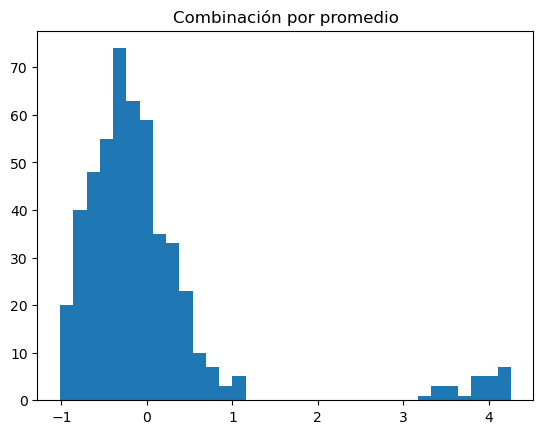

In [27]:
# El promedio de las predicciones de los 10 puntajes están en y_by_average abajo. Se crea esto en un histograma
# El resultado "y_by_average" es una columna:
Y_train_by_average = average(train_scores_norm)
Y_test_by_average = average(test_scores_norm)
plt.hist(Y_train_by_average, bins = 'auto')
plt.title("Combinación por promedio")
plt.show()

In [29]:
Y_train_by_average.mean()

7.247535904753021e-16

In [29]:
descriptive_stat_threshold(X_train, Y_train_by_average, 1.4)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,475,95.0,2.00,2.01,2.01,1.99,2.01,1.98,-0.20
1,Outlier,25,5.0,0.45,-0.21,-0.47,-0.23,-0.03,-0.06,3.86


In [30]:
descriptive_stat_threshold(X_train, Y_train_by_average, 1.4, 2)

,0,1,2,3,4,5,Anomaly_Score,Group
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997,0.154213,Normal
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916,0.049404,Normal
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108,0.283081,Normal
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661,-0.204788,Normal
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549,0.418635,Normal
...,...,...,...,...,...,...,...,...
495,0.939680,0.654842,-0.751916,-0.182345,-1.950749,-0.648304,4.114441,Outlier
496,-0.049990,-0.969233,0.253703,-0.929146,0.592323,0.317324,4.218357,Outlier
497,1.455863,-1.222543,1.037344,1.496361,-1.831690,-0.330749,3.629590,Outlier
498,-0.609912,-1.909667,1.091290,1.513980,1.063402,0.898467,3.820786,Outlier
